## Imports

In [1]:
import pandas as pd

In [23]:
from conllu import parse as connllu_parser

In [28]:
import os

### Early prototyping

In [24]:
test_conllu_data = """
# text = Er arbeitet fürs FBI (deutsch etwa: „Bundesamt für Ermittlung“).
# text_en = He works for the FBI (German approx: “Bundesamt für Ermittlung”).
1     Er           er           PRON    …   _
2     arbeitet     arbeiten     VERB    …   _
3-4   fürs         _            _       …   _
3     für          für          ADP     …   _
4     das          der          DET     …   _
5     FBI          FBI          PROPN   …   _
6     (            (            PUNCT   …   SpaceAfter=No
7     deutsch      deutsch      ADV     …   _
8     etwa         etwa         ADV     …   SpaceAfter=No
9     :            :            PUNCT   …   _
10    „            „            PUNCT   …   SpaceAfter=No
11    Bundesamt    Bundesamt    NOUN    …   _
12    für          für          ADP     …   _
13    Ermittlung   Ermittlung   NOUN    …   SpaceAfter=No
14    “            “            PUNCT   …   SpaceAfter=No
15    )            )            PUNCT   …   SpaceAfter=No
16    .            .            PUNCT   …   _
"""

In [25]:
parsed = connllu_parser(test_conllu_data)

In [21]:
sentence = parsed[0]

In [26]:
for i in parsed:
    print(i)
    print(i[0])

TokenList<Er, arbeitet, fürs, für, das, FBI, (, deutsch, etwa, :, „, Bundesamt, für, Ermittlung, “, ), ., metadata={text: "Er arbeitet fürs FBI (deutsch etwa: „Bundesamt für Ermittlung“).", text_en: "He works for the FBI (German approx: “Bundesamt für Ermittlung”)."}>
Er


In [36]:
sentence[0].keys()

dict_keys(['id', 'form', 'lemma', 'upos', 'xpos', 'feats'])

In [62]:
def update_df_from_collu(conll_string, df, filename):
    parsed_sentences = connllu_parser(conll_string)
    year, month, day = get_date(filename) 
    for sentence in parsed_sentences:
        for word in sentence:
            word['year'] = year
            word['month'] = month
            word['day'] = day
            #print(word.keys())
            df.loc[len(df)] = word

In [63]:
input_folder = 'dummydata'

In [67]:
def get_date(filename):
    year = filename[:4]
    month = filename[:7]
    day = filename[:10]
    #day = filename[8:10]
    return year, month, day

In [68]:
df = pd.DataFrame(columns = ['id', 'form', 'lemma', 
                             'upos', 'xpos', 'feats',
                            'year', 'month', 'day'])
#df.columns = ['id', 'form', 'lemma', 'upos', 'xpos', 'feats']
for filename in os.listdir(input_folder):
    if '.conllu' in filename:
        path = os.path.join(input_folder, filename)
        with open(path) as openconllu:
            conllu_string = openconllu.read()
        update_df_from_collu(conllu_string, df, filename) #conll_df(path, file_index=False)

In [69]:
df

,id,form,lemma,upos,xpos,feats,year,month,day
0,1,Er,er,PRON,…,None,1914,1914-01,1914-01-01
1,2,arbeitet,arbeiten,VERB,…,None,1914,1914-01,1914-01-01
2,"(3, -, 4)",fürs,_,_,…,None,1914,1914-01,1914-01-01
3,3,für,für,ADP,…,None,1914,1914-01,1914-01-01
4,4,das,der,DET,…,None,1914,1914-01,1914-01-01
5,5,FBI,FBI,PROPN,…,None,1914,1914-01,1914-01-01
6,6,(,(,PUNCT,…,{'SpaceAfter': 'No'},1914,1914-01,1914-01-01
7,7,deutsch,deutsch,ADV,…,None,1914,1914-01,1914-01-01
8,8,etwa,etwa,ADV,…,{'SpaceAfter': 'No'},1914,1914-01,1914-01-01
9,9,:,:,PUNCT,…,None,1914,1914-01,1914-01-01


In [94]:
search_term = input('insert search word:')

insert search word:der


In [95]:
df.query(f'lemma=="{search_term}"')

,id,form,lemma,upos,xpos,feats,year,month,day
4,4,das,der,DET,…,None,1914,1914-01,1914-01-01
21,4,das,der,DET,…,None,1914,1914-02,1914-02-01
38,4,das,der,DET,…,None,1914,1914-02,1914-02-01


In [96]:
result = df.query(f'lemma=="{search_term}"')

In [97]:
result.groupby('month').count()

,id,form,lemma,upos,xpos,feats,year,day
month,,,,,,,,
1914-01,1,1,1,1,1,0,1,1
1914-02,2,2,2,2,2,0,2,2


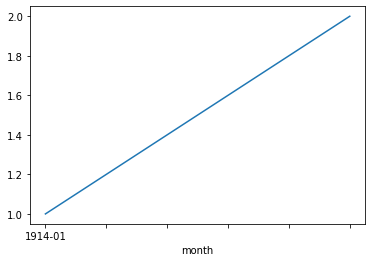

In [98]:
result.groupby('month').count().lemma.plot();

Seems to work

### Making it more production-ready

In [ ]:
class CorpusSearch():
    def __init__:
        